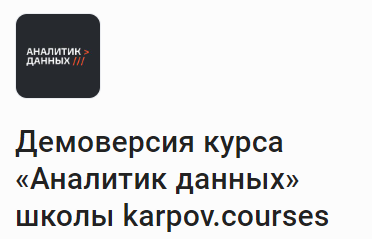

### В Jupyter Notebook
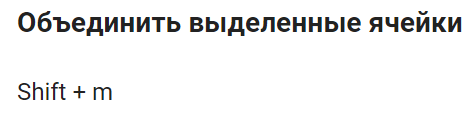
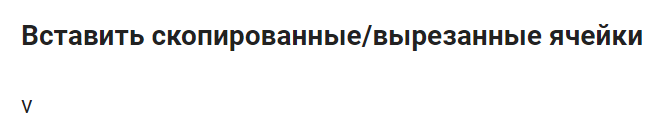

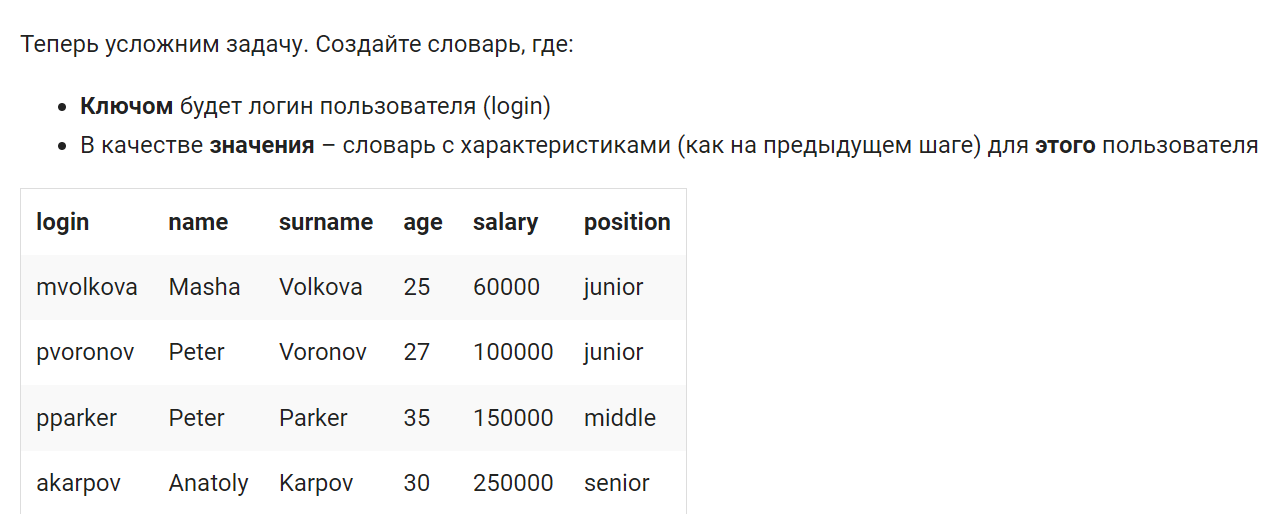

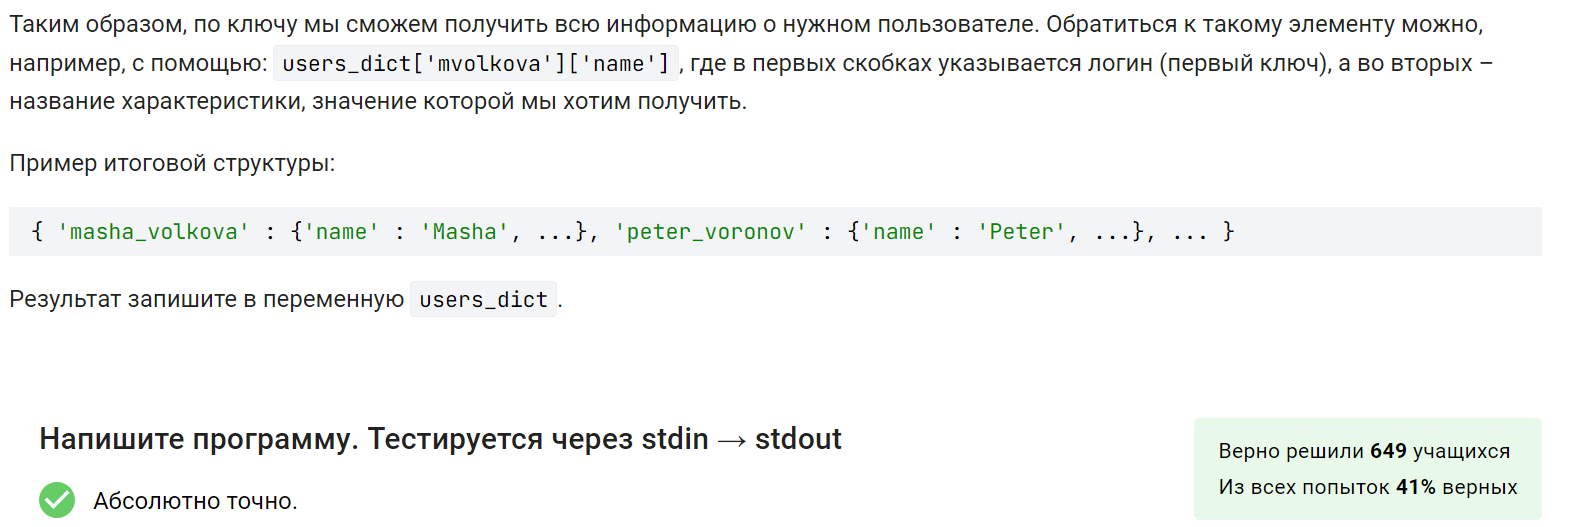

In [1]:
# your code
users_dict = {
    'mvolkova': {
        'name': 'Masha',
        'surname': 'Volkova',
        'age': 25,
        'salary': 60_000,
        'position': 'junior'
    },
    'pvoronov': {
        'name': 'Peter',
        'surname': 'Voronov',
        'age': 27,
        'salary': 100_000,
        'position': 'junior'
    },
    'pparker': {
        'name': 'Peter',
        'surname': 'Parker',
        'age': 35,
        'salary': 150_000,
        'position': 'middle'
    },
    'akarpov': {
        'name': 'Anatoly',
        'surname': 'Karpov',
        'age': 30,
        'salary': 250_000,
        'position': 'senior'
    }
}

# Pandas

In [2]:
import pandas as pd

courses = pd.read_csv('cources.csv', sep=';', encoding='windows-1251')

In [3]:
courses.to_csv('sale of courses.csv', index=False, encoding='utf-8',)

In [4]:
courses.head()

,Номер,Дата создания,Дата оплаты,Title,Статус,Заработано,Город,Платежная система
0,1062823,01.12.2019 10:50,01.12.2019 10:52,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,01.12.2019 20:53,01.12.2019 21:27,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,01.12.2019 21:43,NaN,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,03.12.2019 0:18,NaN,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,03.12.2019 21:43,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [5]:
courses.shape

(292, 8)

In [6]:
courses.dtypes

Номер                  int64
Дата создания         object
Дата оплаты           object
Title                 object
Статус                object
Заработано           float64
Город                 object
Платежная система     object
dtype: object

In [7]:
courses.describe().T

,count,mean,std,min,25%,50%,75%,max
Номер,292.0,1.063745e+06,443.868754,1062823.0,1063607.5,1063697.50,1063807.00,1064796.0
Заработано,292.0,3.397615e+03,5771.572829,0.0,0.0,2935.44,2935.44,42750.0


In [8]:
# Categorical features
courses.describe(include=object).T

,count,unique,top,freq
Дата создания,292,180,19.12.2019 21:08,14
Дата оплаты,180,142,19.12.2019 21:18,4
Title,292,6,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,182
Статус,292,5,Завершен,180
Город,279,111,г.Москва и Московская область,39
Платежная система,182,13,Яндекс.Касса,118


In [9]:
courses.columns

Index(['Номер', 'Дата создания', 'Дата оплаты', 'Title', 'Статус',
       'Заработано', 'Город', 'Платежная система'],
      dtype='object')

### Let's rename the Russian columns to their English equivalents.

In [10]:
courses.rename(
    columns={
        'Номер': 'Number',
        'Дата создания': 'Creation date', 
        'Дата оплаты': 'Payment date',
        'Статус': 'Status',
        'Заработано': 'Earned', 
        'Город': 'City',
        'Платежная система': 'Payment system'
    },
    inplace=True
)

In [11]:
courses.columns

Index(['Number', 'Creation date', 'Payment date', 'Title', 'Status', 'Earned',
       'City', 'Payment system'],
      dtype='object')

### It is good practise to rename initial names of columns. After analysis we can return them

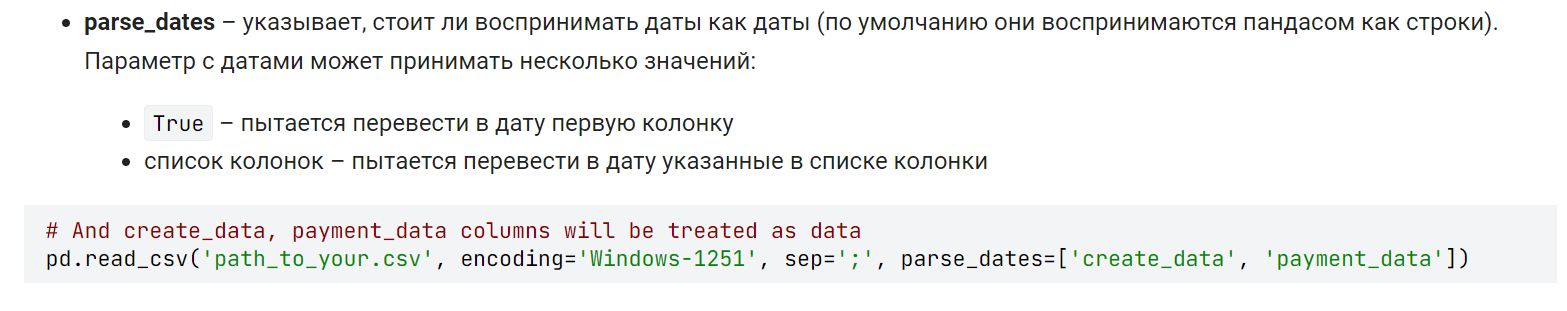

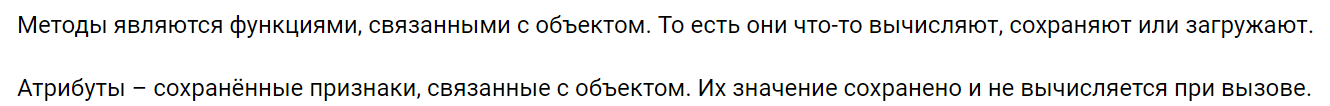

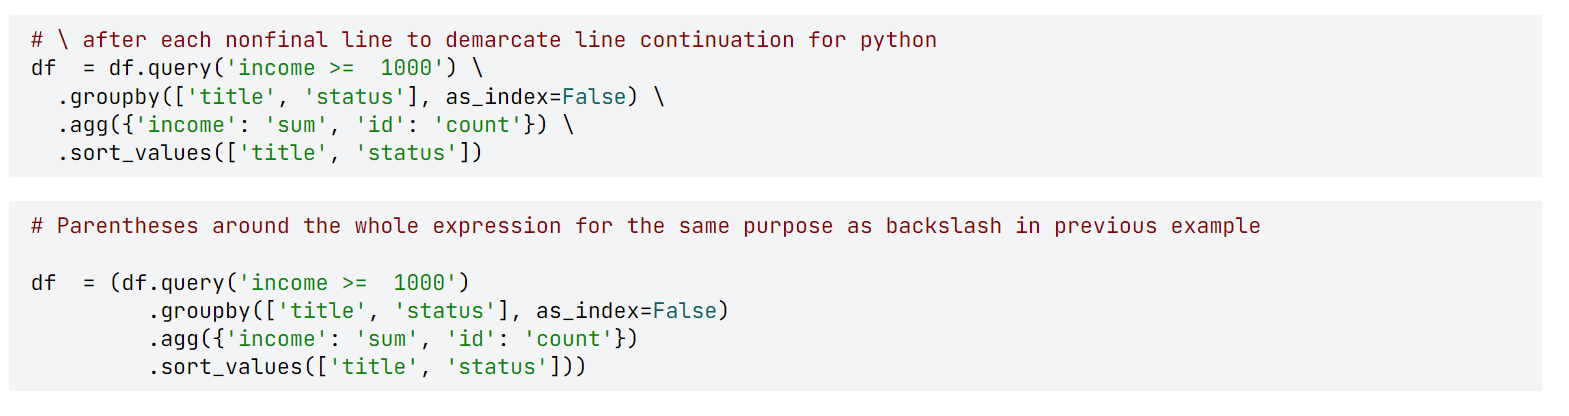

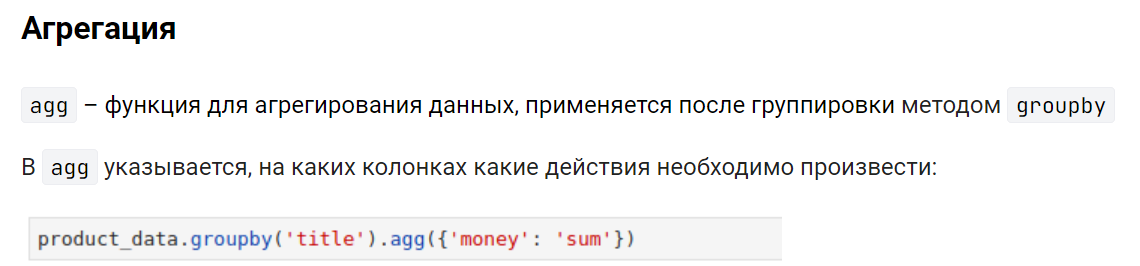

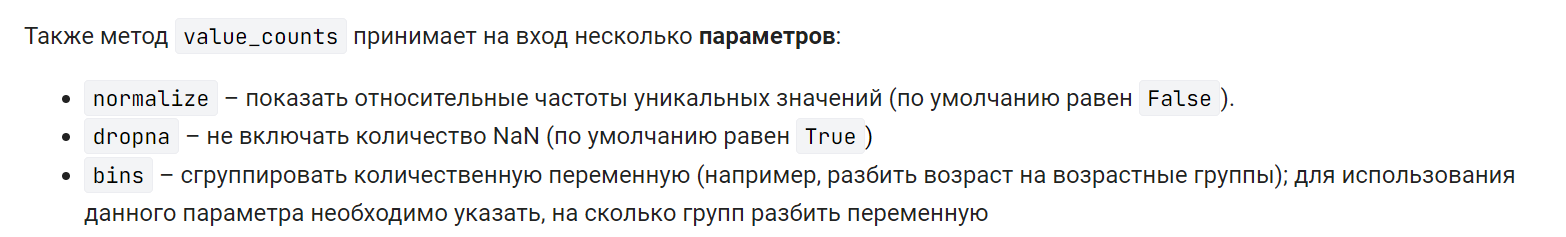

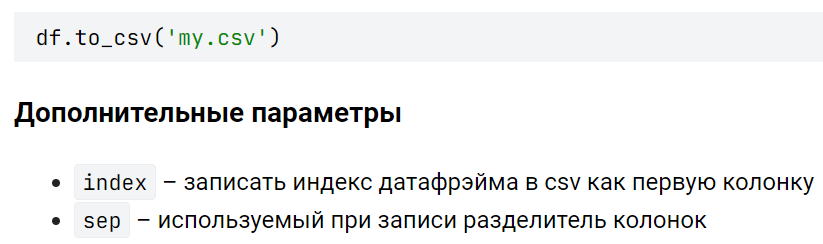

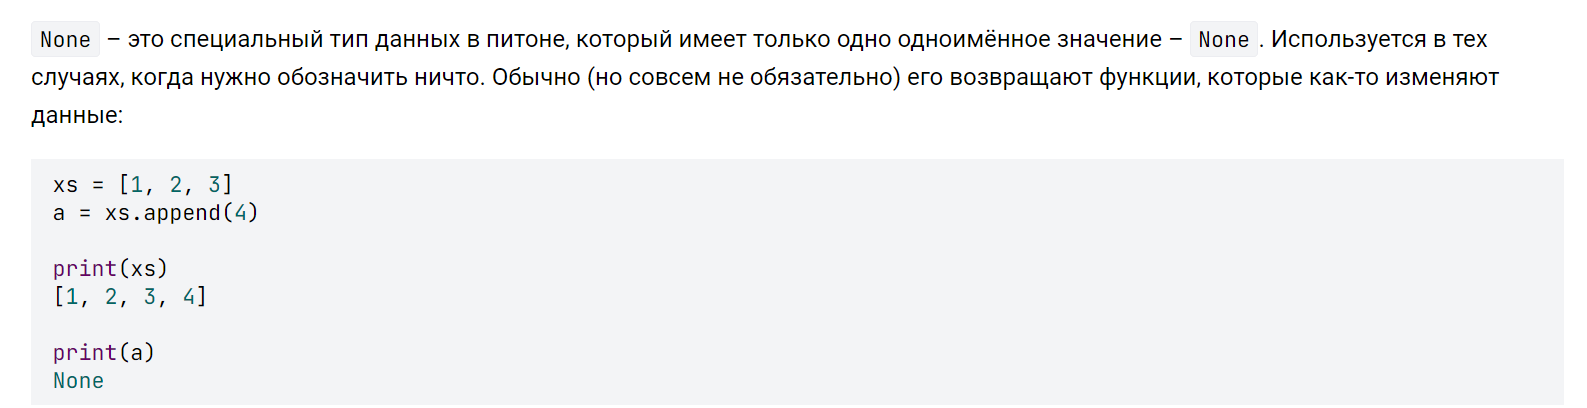

In [12]:
courses.head()

,Number,Creation date,Payment date,Title,Status,Earned,City,Payment system
0,1062823,01.12.2019 10:50,01.12.2019 10:52,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,01.12.2019 20:53,01.12.2019 21:27,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,01.12.2019 21:43,NaN,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,03.12.2019 0:18,NaN,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,03.12.2019 21:43,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [13]:
all_money = courses['Earned'].sum()
all_money

992103.5900000001

### Лучше все колонки держать в нижнем регистре с соединением слов нижним подчеркиванием

In [14]:
courses.groupby('Title').agg({'Earned': 'sum'})

,Earned
Title,
Курс обучения «Консультант»,208163.49
Курс обучения «Специалист»,160862.64
Курс обучения «Эксперт»,148992.80
Курс от Школы Диетологов. Бизнес,18752.54
Курс от Школы Диетологов. Повышение квалификации.,88384.92
Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосписанием,366947.20


### Теперь Title стал индексом датафрейма

In [15]:
courses.groupby(by='Title', as_index=False).agg({'Earned': 'sum'}).sort_values(by='Earned', ascending=False)  # Теперь индекс стандартный

,Title,Earned
5,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,366947.20
0,Курс обучения «Консультант»,208163.49
1,Курс обучения «Специалист»,160862.64
2,Курс обучения «Эксперт»,148992.80
4,Курс от Школы Диетологов. Повышение квалификац...,88384.92
3,Курс от Школы Диетологов. Бизнес,18752.54


In [16]:
# Более красивая форма записи запроса
query_1 = (courses.groupby(by=['Title', 'City'], as_index=False)
               .agg({'Earned': 'sum'})
               .sort_values(by='Earned', ascending=False))

query_1.head()

,Title,City,Earned
51,Курс обучения «Эксперт»,г.Санкт-Петербург и Ленинградская область,59195.00
156,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,г.Москва и Московская область,46967.04
39,Курс обучения «Эксперт»,Балхаш,42750.00
95,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Краснодарский край,38169.78
30,Курс обучения «Специалист»,Краснодар,29695.70


In [17]:
query_1.to_csv('money_by_city.csv', index=False)

In [18]:
query_2 = (courses.query("Status == 'Завершен'")
               .groupby(by='Title', as_index=False)
               .agg({'Earned': 'sum', 'Number': 'count'})
               .sort_values(by='Earned', ascending=False))

query_2.head()

,Title,Earned,Number
5,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,366947.20,125
0,Курс обучения «Консультант»,208163.49,31
1,Курс обучения «Специалист»,160862.64,7
2,Курс обучения «Эксперт»,148992.80,5
4,Курс от Школы Диетологов. Повышение квалификац...,88384.92,9


In [19]:
query_2.to_csv('number_success_orders.csv', index=False)